In [1]:
# Solving the deterministic Optimal Growth model by Value Function Interation 
# adapted from Fabrice Collard's Matlab code, http://fabcol.free.fr/
# tested in Julia 1.15
# this code is part of chapter 4, "Dynamic Programming" from the book: "Introduction to Quantitative Macroeconomics with Julia"
# Academic Press - Elsevier
# for comments, email at: petre(dot)caraiani(at)gmail(dot)com

sigma = 1.5;
delta = 0.1;
beta  = 0.95;
alpha = 0.30;
ks    = ((1-beta*(1-delta))/(alpha*beta))^(1/(alpha-1));
csy   = 1-alpha*beta*delta/(1-beta*(1-delta));
dev   = 0.9;
kmin  = (1-dev)*ks;
kmax  = (1+dev)*ks;
nbk   = 1000;
devk  = (kmax-kmin)/(nbk-1);
k     = collect(LinRange(kmin,kmax,nbk));
v0    = zeros(nbk,1);
v0    = ((csy*k.^alpha).^(1-sigma).-1)./((1-sigma)*(1-beta));
v     = zeros(nbk,1);
ik1   = zeros(nbk,1);
iter  = 1;
crit  = 1;
tol   = 1e-6;
u     = 0;

In [2]:
while crit>tol;
   for i=1:nbk
      imin =  max(ceil(((1-delta)*k[i]-kmin)/devk)+1.0,1);
      imax =  min(floor((k[i]^alpha+(1-delta)*k[i]-kmin)/devk)+1.0,nbk);
        
      imin=trunc(Int, imin);
      imax=trunc(Int, imax);
      c = k[i]^alpha+(1-delta)*k[i].-k[imin:imax];
      u = (c.^(1-sigma).-1)/(1-sigma);
      (v[i],itmp)= findmax(u+beta*v0[imin:imax]);
      ik1[i] = imin-1+itmp;
   end;
   error=abs.(v[:,1]-v0);
   crit= maximum(error);
   copy!(v0, v[:,1])
   iter= iter+1;
end


In [3]:
#solution
k1   = zeros(nbk,1);

for i=1:nbk
   index=trunc(Int, ik1[i]);

   k1[i]= k[index];
  
    end;

c = k.^alpha+(1-delta)*k-k1;
u = (c.^(1-sigma).-1)/(1-sigma);
v =u./(1-beta);


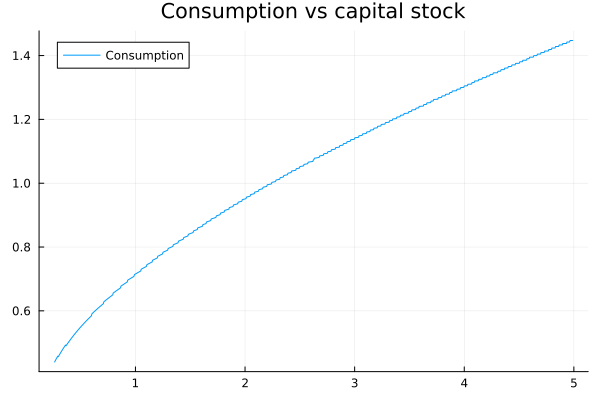

In [4]:
#Pkg.add("Plots")
using Plots
#using Pkg
#Pkg.add("PlotlyJS")
#plotly() # Choose the Plotly.jl backend for web interactivity
plot(k,c,linewidth=1,label="Consumption",title="Consumption vs capital stock")
#plotlyjs()
#fig=plot(k,v,linewidth=1,label="Capital Stock",title="Capital stock vs Value Function")
#display(fig)

